## Kmeans Clustering

### 1.[Elbow Curve](#elb)

### 2.[Kmeans Cluster](#kme)

### 3.[Standardize Data](#stand)

### 4.[Repeat Elbow Curve](#repel)

### 5.[Repeat Kmeans Cluster](#repkme)

### 6.[Plot Different Variables with Clusters](#plvar)

### 7.[Analyse Clusters](#anclu)

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
%matplotlib inline

In [3]:
path = r"C:\Users\corri\Documents\New Career\Achievment 6\Rabies Project\Data"

In [4]:
#Import dataframe
df_rabies = pd.read_csv(os.path.join(path, 'Prepared Data', 'Renamed_Total.csv'))

In [5]:
df_rabies.head(10)

,Unnamed: 0,Year,Semester,Country,Animal Category,Species,Susceptible,Cases,Killed,Slaughtered,Deaths,Vaccinated,Total Cases
0,11206,2010,Jan-Jun 2010,Algeria,Domestic,Cats,53,12,6,0,6,0,7742
1,11207,2010,Jan-Jun 2010,Algeria,Domestic,Cattle,1049,93,47,17,29,0,7742
2,11208,2010,Jan-Jun 2010,Algeria,Domestic,Dogs,550,168,135,0,65,0,7742
3,11209,2010,Jan-Jun 2010,Algeria,Domestic,Equidae,93,28,15,0,13,0,7742
4,11210,2010,Jan-Jun 2010,Algeria,Domestic,Goats,748,8,3,0,5,0,7742
5,11211,2010,Jan-Jun 2010,Algeria,Domestic,Sheep,4478,22,15,0,7,0,7742
6,11212,2010,Jan-Jun 2010,Algeria,Wild,Wildlife (species unspecified),1,1,1,0,0,0,7742
7,11213,2010,Jan-Jun 2010,Angola,Domestic,Cattle,143,1,0,0,1,0,226
8,11214,2010,Jan-Jun 2010,Angola,Domestic,Dogs,795,13,0,0,13,782,226
9,11215,2010,Jan-Jun 2010,Benin,Domestic,Dogs,0,1,0,0,1,0,112


In [6]:
#Remove categorical columns
df_rabies = df_rabies.drop(columns = ['Unnamed: 0', 'Year', 'Semester', 'Country', 'Animal Category', 'Species'])

In [7]:
df_rabies.head(10)

,Susceptible,Cases,Killed,Slaughtered,Deaths,Vaccinated,Total Cases
0,53,12,6,0,6,0,7742
1,1049,93,47,17,29,0,7742
2,550,168,135,0,65,0,7742
3,93,28,15,0,13,0,7742
4,748,8,3,0,5,0,7742
5,4478,22,15,0,7,0,7742
6,1,1,1,0,0,0,7742
7,143,1,0,0,1,0,226
8,795,13,0,0,13,782,226
9,0,1,0,0,1,0,112


In [8]:
df_rabies.describe()

,Susceptible,Cases,Killed,Slaughtered,Deaths,Vaccinated,Total Cases
count,2.595200e+04,25952.000000,25952.000000,25952.000000,25952.000000,2.595200e+04,25952.000000
mean,3.822893e+03,7.446401,2.330919,0.135789,5.962546,4.218992e+03,7020.824638
std,1.739252e+05,35.678112,31.955536,6.198928,31.895096,3.680454e+05,7158.797751
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000
25%,0.000000e+00,1.000000,0.000000,0.000000,1.000000,0.000000e+00,1169.000000
50%,0.000000e+00,2.000000,0.000000,0.000000,2.000000,0.000000e+00,3951.000000
75%,2.400000e+01,6.000000,0.000000,0.000000,5.000000,0.000000e+00,11123.000000
max,1.278000e+07,3226.000000,2224.000000,823.000000,3226.000000,4.775152e+07,20587.000000


## Elbow Curve
<a id='elb'></a>

In [9]:
# Create elbow data to determine cluster number
num_cl = range(1,10)
kmeans = [KMeans(n_clusters = i) for i in num_cl]

In [10]:
#Elbow score
score = [kmeans[i].fit(df_rabies).score(df_rabies) for i in range (len(kmeans))]

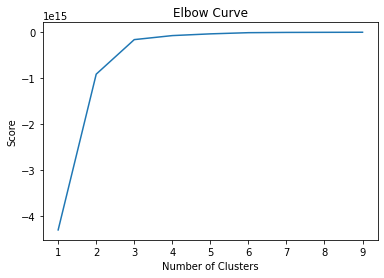

In [11]:
#Plot elbow curve
pl.plot(num_cl, score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()  #  3 clusters looks like the ideal number for this data set as that is where it starts to plateau

## Kmeans Cluster
<a id='kme'></a>

In [13]:
#Create kmeans with appropriate cluster number
kmeans = KMeans(n_clusters = 3)

In [14]:
#Fit the data to the kmeans
kmeans.fit(df_rabies)

KMeans(n_clusters=3)

In [15]:
df_rabies['clusters'] = kmeans.fit_predict(df_rabies)

In [16]:
df_rabies.head(10)

,Susceptible,Cases,Killed,Slaughtered,Deaths,Vaccinated,Total Cases,clusters
0,53,12,6,0,6,0,7742,0
1,1049,93,47,17,29,0,7742,0
2,550,168,135,0,65,0,7742,0
3,93,28,15,0,13,0,7742,0
4,748,8,3,0,5,0,7742,0
5,4478,22,15,0,7,0,7742,0
6,1,1,1,0,0,0,7742,0
7,143,1,0,0,1,0,226,0
8,795,13,0,0,13,782,226,0
9,0,1,0,0,1,0,112,0


In [17]:
# Count the clusters values
df_rabies['clusters'].value_counts()
# These values make me think the values in the various variables are too extreme, creating too much weight for certain variables

0    25942
2        8
1        2
Name: clusters, dtype: int64

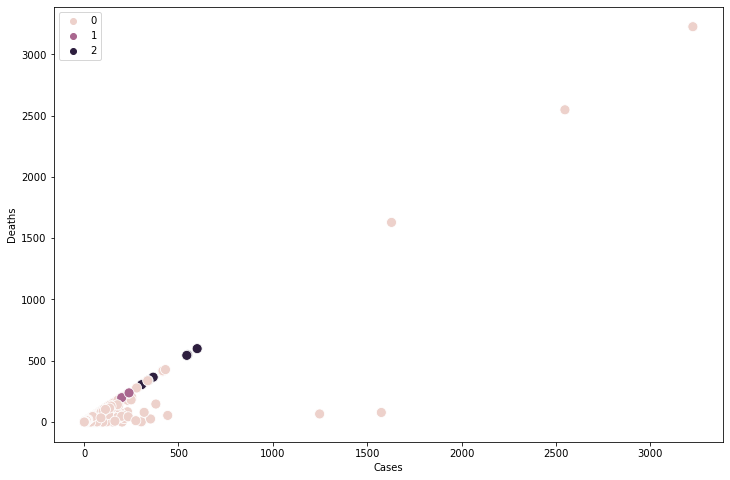

In [18]:
# Plots based on clusters
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df_rabies['Cases'], y = df_rabies['Deaths'], hue = kmeans.labels_, s = 100)
ax.grid(False)
plt.xlabel('Cases')
plt.ylabel('Deaths')
plt.show()

In [19]:
# Need to standardize the data to prevent the weight all shifting to one variable.  Remove clusters column:
df_rabies = df_rabies.drop(columns = ['clusters'])

In [20]:
df_rabies.head(10)

,Susceptible,Cases,Killed,Slaughtered,Deaths,Vaccinated,Total Cases
0,53,12,6,0,6,0,7742
1,1049,93,47,17,29,0,7742
2,550,168,135,0,65,0,7742
3,93,28,15,0,13,0,7742
4,748,8,3,0,5,0,7742
5,4478,22,15,0,7,0,7742
6,1,1,1,0,0,0,7742
7,143,1,0,0,1,0,226
8,795,13,0,0,13,782,226
9,0,1,0,0,1,0,112


## Standardize Data
<a id='stand'></a>

In [21]:
#Import required libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [22]:
# Standardize data
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df_rabies)

In [23]:
# Use PCA to reduce dimensionality
pca = PCA()
pca.fit(segmentation_std)

PCA()

Text(0, 0.5, 'Cumulative Explained Variance')

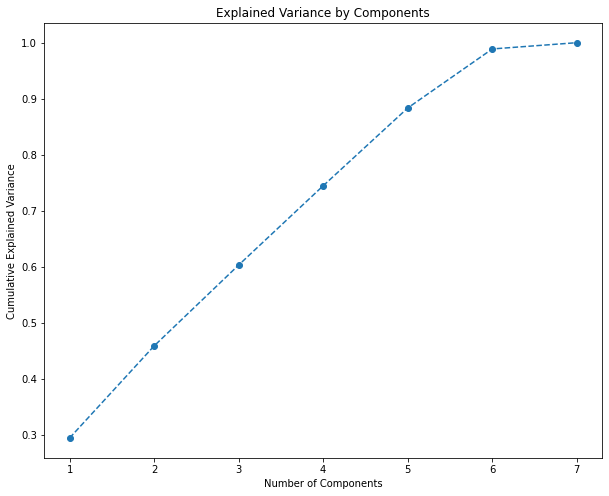

In [24]:
#Plot the curve of the resulting data
plt.figure(figsize = (10,8))
plt.plot(range (1, 8), pca.explained_variance_ratio_.cumsum(),marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [25]:
# Rule of thumb to keep 80%, will keep 5 components
pca = PCA(n_components = 5)
pca.fit(segmentation_std)

PCA(n_components=5)

In [26]:
# Calculate resulting component scores for elements of data set
pca.transform(segmentation_std)
score_pca = pca.transform(segmentation_std)

## Repeat Elbow Curve
<a id='repel'></a>

In [27]:
# Rerun elbow method using score_pca data
num_cl2 = range(1,10)
kmeans2 = [KMeans(n_clusters = i)for i in num_cl2]

In [28]:
score2 = [kmeans2[i].fit(score_pca).score(score_pca) for i in range(len(kmeans2))]

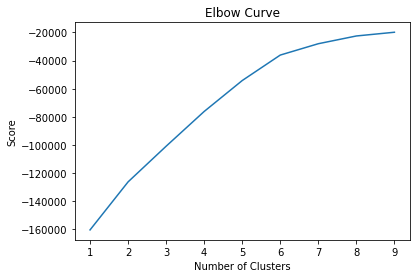

In [29]:
pl.plot(num_cl2, score2)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show() # this standardized data shows a need for 6 clusters for running kmeans

## Repeat Kmeans Cluster
<a id='repkme'></a>

In [30]:
#Repeat kmeans using 6 clusters on standardized data
kmeans2 = KMeans(n_clusters = 6)

In [31]:
kmeans2.fit(score_pca)

KMeans(n_clusters=6)

In [32]:
#Combine original data frame with results of standardization
df_combo = pd.concat([df_rabies.reset_index(drop=True), pd.DataFrame(score_pca)], axis = 1)
df_combo.columns.values[-5:] = ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5']
df_combo['Segment K-means PCA'] = kmeans2.labels_

In [33]:
df_combo.head(10)

,Susceptible,Cases,Killed,Slaughtered,Deaths,Vaccinated,Total Cases,Component 1,Component 2,Component 3,Component 4,Component 5,Segment K-means PCA
0,53,12,6,0,6,0,7742,0.111064,0.000907,-0.033709,0.053531,-0.084853,0
1,1049,93,47,17,29,0,7742,2.542090,0.137947,2.276493,1.530587,0.314037,0
2,550,168,135,0,65,0,7742,5.248058,0.892871,0.633192,-0.287911,-1.058900,0
3,93,28,15,0,13,0,7742,0.621584,0.002644,0.022498,0.010771,-0.151021,0
4,748,8,3,0,5,0,7742,-0.006686,-0.018135,-0.050355,0.061200,-0.062638,0
5,4478,22,15,0,7,0,7742,0.396887,0.113310,0.007876,0.042350,-0.158288,0
6,1,1,1,0,0,0,7742,-0.253946,0.033151,-0.068996,0.087993,-0.049290,0
7,143,1,0,0,1,0,226,-0.283395,0.233191,0.391593,-0.700791,0.424664,0
8,795,13,0,0,13,782,226,0.180205,0.046571,0.413338,-0.761016,0.432763,0
9,0,1,0,0,1,0,112,-0.284235,0.236125,0.398722,-0.712728,0.431851,0


In [34]:
df_combo['Segment K-means PCA'].value_counts()
# This is improved over the original data but is still very heavily weighted into the 0 category.

0    19338
4     6594
1       11
3        4
2        3
5        2
Name: Segment K-means PCA, dtype: int64

## Plot Different Variables with Clusters
<a id ='plvar'></a>

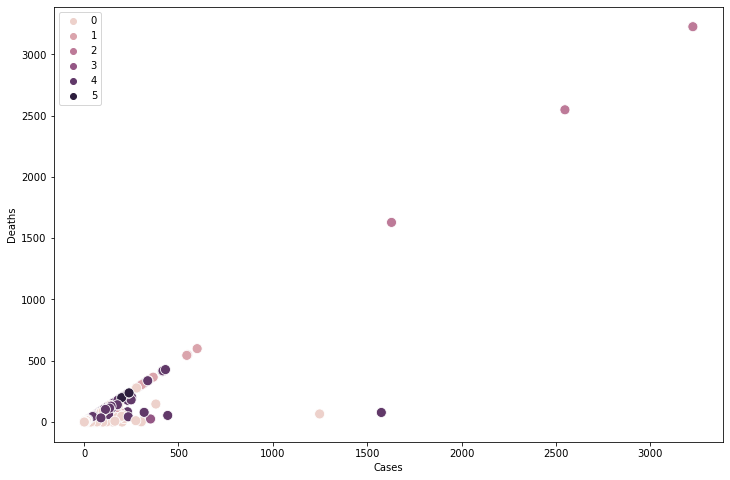

In [35]:
#Plot Cases vs Deaths with clusters
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df_combo['Cases'], y = df_combo['Deaths'], hue = kmeans2.labels_, s = 100)
ax.grid(False)
plt.xlabel('Cases')
plt.ylabel('Deaths')
plt.show()

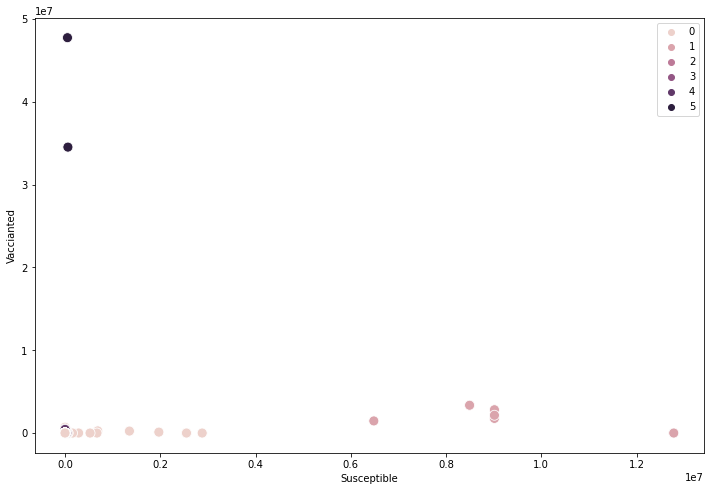

In [36]:
#Plot Susceptible vs Vaccianted with clusters
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df_combo['Susceptible'], y = df_combo['Vaccinated'], hue = kmeans2.labels_, s = 100)
ax.grid(False)
plt.xlabel('Susceptible')
plt.ylabel('Vaccianted')
plt.show()

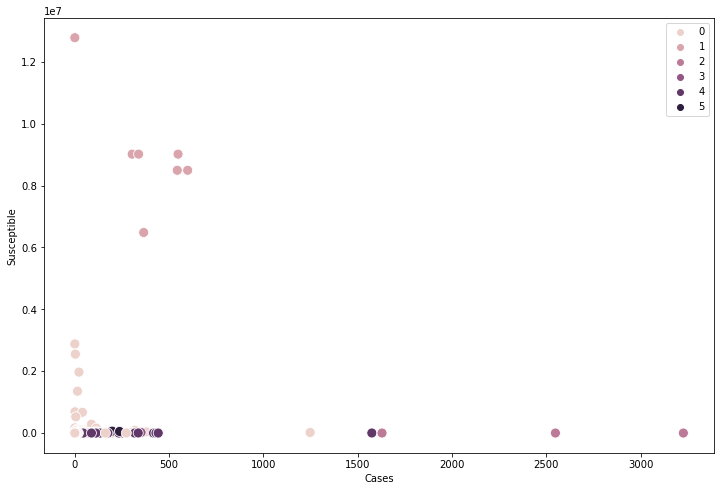

In [37]:
#Plot Cases vs Susceptible with clusters
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df_combo['Cases'], y = df_combo['Susceptible'], hue = kmeans2.labels_, s = 100)
ax.grid(False)
plt.xlabel('Cases')
plt.ylabel('Susceptible')
plt.show()

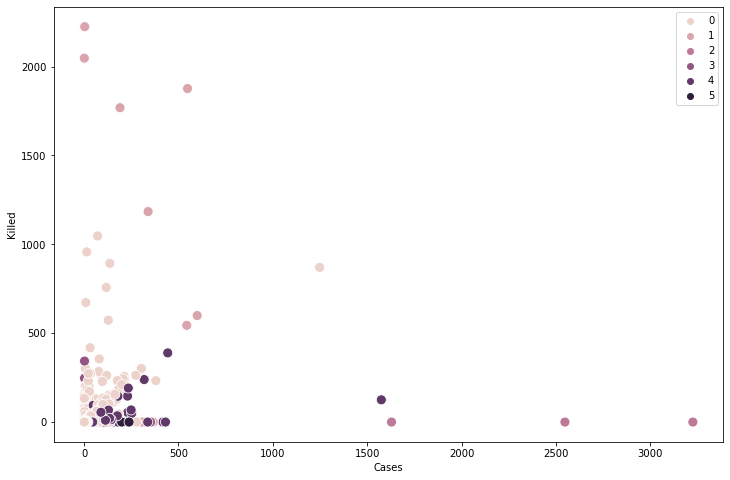

In [38]:
#Plot Cases vs Killed with clusters
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df_combo['Cases'], y = df_combo['Killed'], hue = kmeans2.labels_, s = 100)
ax.grid(False)
plt.xlabel('Cases')
plt.ylabel('Killed')
plt.show()

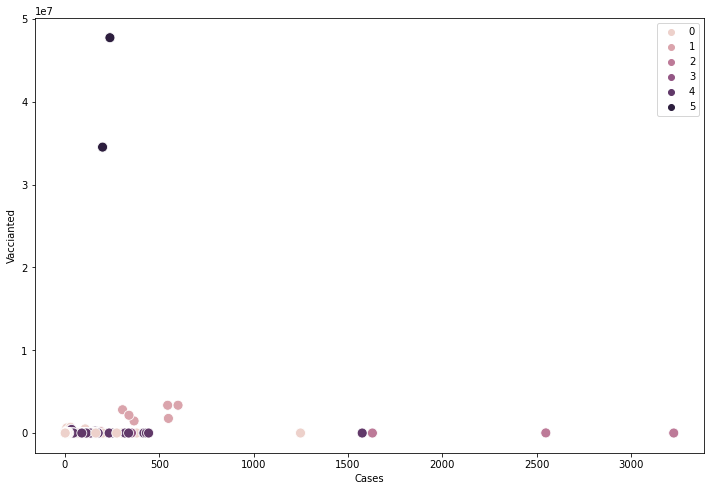

In [39]:
# Plot Cases vs Vaccinated with clusters
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df_combo['Cases'], y = df_combo['Vaccinated'], hue = kmeans2.labels_, s = 100)
ax.grid(False)
plt.xlabel('Cases')
plt.ylabel('Vaccianted')
plt.show()

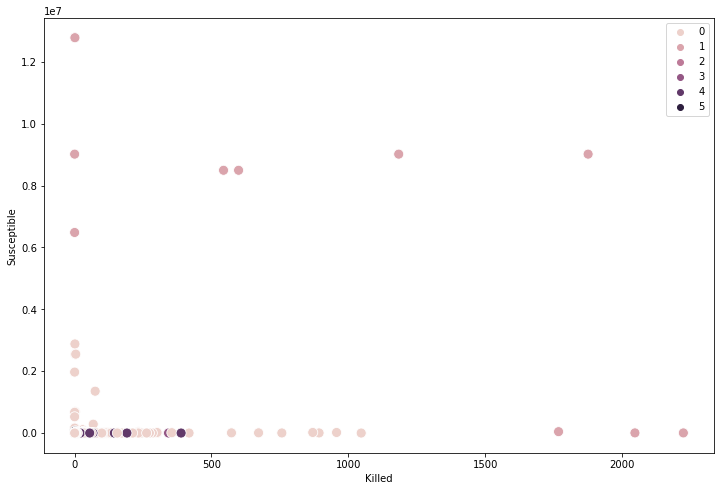

In [45]:
# Plot Killed vs Susceptible with clusters
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df_combo['Killed'], y = df_combo['Susceptible'], hue = kmeans2.labels_, s = 100)
ax.grid(False)
plt.xlabel('Killed')
plt.ylabel('Susceptible')
plt.show()

### There are some obvious clusters in the Susceptible vs Vaccinated plot (even though linear regression did not show any correlation between the two).  The other plots are not providing new information for interpretation based on clustering.

## Analyze Clusters
<a id='anclu'></a>

In [40]:
#Rename the clusters by color
df_combo.loc[df_combo['Segment K-means PCA'] == 0, 'cluster'] = 'Pale pink'
df_combo.loc[df_combo['Segment K-means PCA'] == 1, 'cluster'] = 'Light pink'
df_combo.loc[df_combo['Segment K-means PCA'] == 2, 'cluster'] = 'Pink'
df_combo.loc[df_combo['Segment K-means PCA'] == 3, 'cluster'] = 'Purple'
df_combo.loc[df_combo['Segment K-means PCA'] == 4, 'cluster'] = 'Medium Purple'
df_combo.loc[df_combo['Segment K-means PCA'] == 5, 'cluster'] = 'Dark Purple'

In [43]:
df_combo['cluster'].value_counts()

Pale pink        19338
Medium Purple     6594
Light pink          11
Purple               4
Pink                 3
Dark Purple          2
Name: cluster, dtype: int64

In [42]:
# Create descriptive statistics grouped by the clusters
df_combo.groupby('cluster').agg({'Susceptible':['mean', 'median'], 'Cases':['mean', 'median'], 
                                             'Killed':['mean', 'median'], 'Slaughtered':['mean', 'median'],
                                            'Deaths': ['mean', 'median'], 'Vaccinated': ['mean', 'median']})

Susceptible                   Cases              Killed  \
                       mean     median         mean  median        mean   
cluster                                                                   
Dark Purple    5.621500e+04    56215.0   218.500000   218.5    0.000000   
Light pink     6.920901e+06  8493952.0   263.363636   305.0  931.272727   
Medium Purple  9.315757e+01        0.0     9.503640     3.0    0.976645   
Pale pink      1.154706e+03        2.0     6.178664     2.0    2.234874   
Pink           0.000000e+00        0.0  2467.666667  2548.0    0.000000   
Purple         6.345500e+03     3405.0    90.500000     4.0  147.500000   

                     Slaughtered              Deaths            Vaccinated  \
              median        mean median         mean  median          mean   
cluster                                                                      
Dark Purple      0.0    0.000000    0.0   218.500000   218.5  4.114305e+07   
Light pink     599.0    0.000000    0.0   253.181818   305.0  1.374027e+06   
Medium Purple    0.0    0.140734    0.0     8.194116     3.0  1.832357e+02   
Pale pink        0.0    0.046385    0.0     4.656893     1.0  5.600583e+02   
Pink             0.0    0.000000    0.0  2467.666667  2548.0  6.225333e+03   
Purple         123.5  424.750000  314.5     7.000000     1.5  8.390750e+03   

                           
                   median  
cluster                    
Dark Purple    41143049.0  
Light pink      1461683.0  
Medium Purple         0.0  
Pale pink             0.0  
Pink               1853.0  
Purple             3356.5

### The pale pink cluster holds the most data points and it appears to be in the middle for all values.  Light pink cluster has the highest Susceptible and Killed numbers.  Pink has the most Cases and Deaths.  Purple has the most Slaughtered. Dark purple cluster has the most Vaccinated.  Overall I feel the data needs to be looked at in other ways to get more information out of it.  Clustering may not be the best way to view this type of data.  I'm still looking for changes over time.